#### Author: Amruni Miriyala

## Decision Trees

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

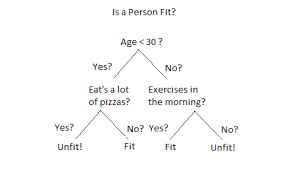

The following approach implements the **Decision Tree algorithm** using the Scikit-Learn library in Python. In this scenario, the objective is to assist a lending institution in determining which financial and personal attributes are most predictive of loan approval. This enables more informed, fair, and data-driven decisions in the loan approval process.

The model is trained on a Loan Approval dataset taken from Kaggle, which includes various financial and demographic features such as:

- CIBIL Score: A credit score that indicates the applicant creditworthiness.
- Income: Monthly or annual income of the applicant.
- Employment Status: Whether the applicant is salaried, self-employed, or unemployed.
- Loan Term: The duration of the loan repayment period.
- Loan Amount: The amount of loan requested by the applicant.
- Assets Value: The total value of the applicant’s owned assets.
- Loan Status: Whether the loan was approved or rejected (the target variable).

By using a Decision Tree classifier, the model learns to map various combinations of these features to a binary decision—Approved or Rejected. The tree structure provides clear, interpretable rules that highlight which attributes (and thresholds) are most influential in the loan approval decision.

This helps the lending institution understand:
- Which financial behaviors or profiles are more likely to lead to approval.
- How to tailor lending strategies or financial advice to applicants.
- Where to refine risk assessment and compliance policies.

Ultimately, this model supports more transparent and efficient loan processing, while reducing the risk of default and improving customer satisfaction.

#### Import Statements and Dataset Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

#### Basic Dataset Exploration

In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#### Data Manipulation

In [8]:
df = df.drop(columns="loan_id")
df.head()

no_of_dependents      education  self_employed   income_annum  \
0                  2       Graduate             No        9600000   
1                  0   Not Graduate            Yes        4100000   
2                  3       Graduate             No        9100000   
3                  3       Graduate             No        8200000   
4                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

#### Data Visualization

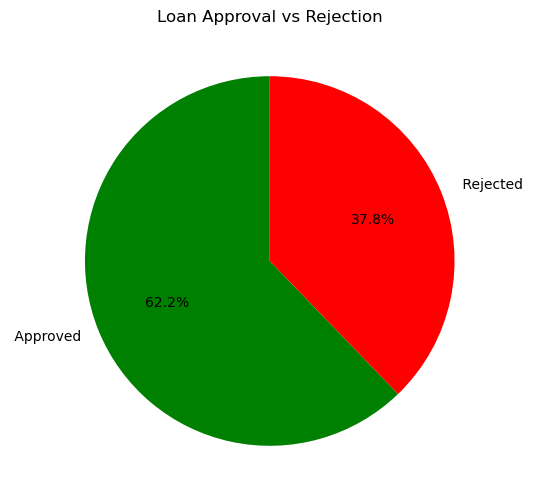

In [9]:
status_counts = df[' loan_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title("Loan Approval vs Rejection")
plt.show()

In [10]:
fig = px.histogram(df, x=" loan_status", color=" education", title="<b>Education and Loan Status</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

From the above figure, we can surmise that education does not have much of an impact on the loan status.

In [11]:
fig = px.histogram(df, x=" loan_status", color=" self_employed", title="<b>Self Employment and Loan Status</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

From the above figure, we can surmise that self employment does not have much of an impact on the loan status.

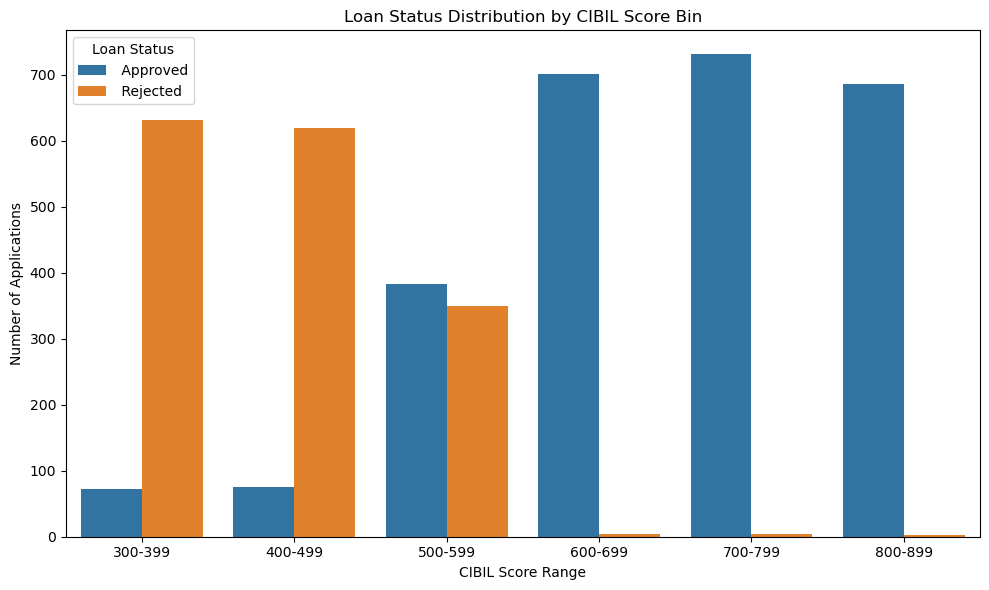

In [12]:
bins = [300, 400, 500, 600, 700, 800, 900]
labels = ['300-399', '400-499', '500-599', '600-699', '700-799', '800-899']

grouped = (
    df
    .assign(cibil_bin=pd.cut(df[' cibil_score'], bins=bins, labels=labels, right=False))
    .groupby(['cibil_bin', ' loan_status'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='cibil_bin', y='Count', hue=' loan_status')
plt.title('Loan Status Distribution by CIBIL Score Bin')
plt.xlabel('CIBIL Score Range')
plt.ylabel('Number of Applications')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

From the above figure, we can clearly see that those with lower cibil scores have a much higher chance of rejection as opposed to those with higher cibil scores.

In [13]:
color_map = {"Approved": "#FF97FF", "Rejected": "#AB63FA"}
fig = px.histogram(df, x=" loan_status", color=" no_of_dependents", barmode="group", title="<b>No.of Dependents and Loan Status</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

From the above figure, we can surmise that number of dependents does not have much of an impact on the loan status.

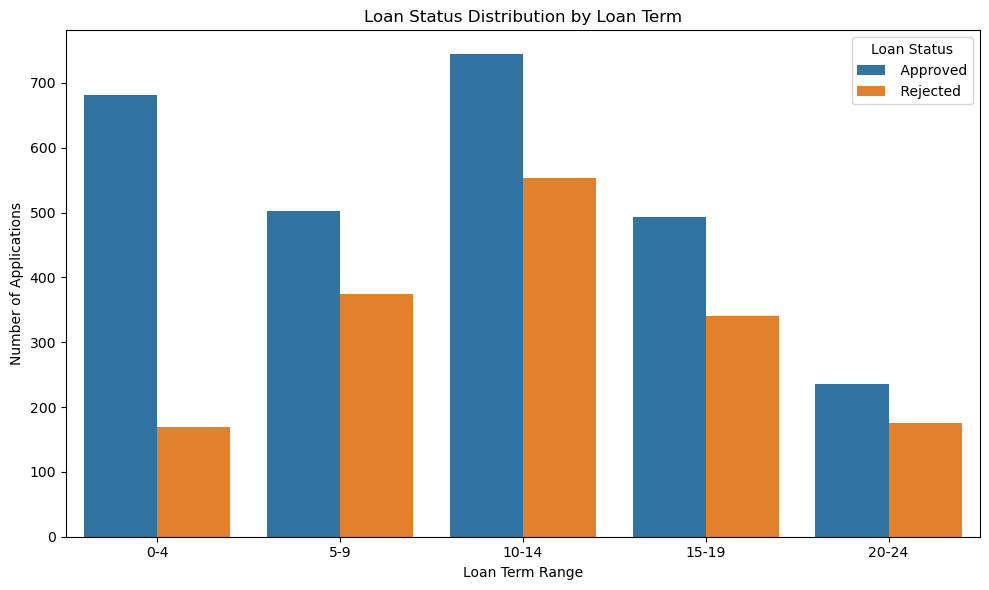

In [14]:
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24']

grouped = (
    df
    .assign(loan_bin=pd.cut(df[' loan_term'], bins=bins, labels=labels, right=False))
    .groupby(['loan_bin', ' loan_status'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='loan_bin', y='Count', hue=' loan_status')
plt.title('Loan Status Distribution by Loan Term')
plt.xlabel('Loan Term Range')
plt.ylabel('Number of Applications')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

From the above figure, we can clearly see that short term loans have a much higher approval rate while long term loans have proportionally a lower approval rate. This may show reluctance in loans being approved for longer durations.

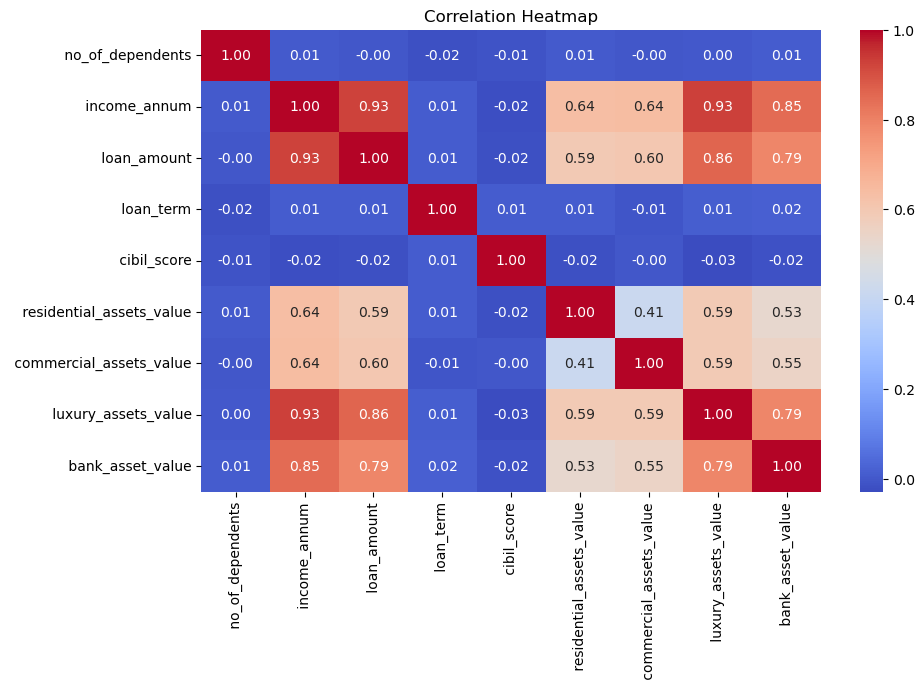

In [15]:
numeric_cols = df.select_dtypes(include=np.number)

corr = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
high_corr_pairs = [
    (' income_annum', ' loan_amount'),
    (' loan_amount', ' loan_term'),
    (' loan_amount', ' cibil_score'),
    (' residential_assets_value', ' bank_asset_value'),
    (' luxury_assets_value', ' loan_amount'),
    (' commercial_assets_value', ' loan_amount')
]

fig = make_subplots(rows=2, cols=3, subplot_titles=[f'{x} vs {y}' for x, y in high_corr_pairs])

for i, (x_col, y_col) in enumerate(high_corr_pairs):
    row, col = divmod(i, 3)
    trace = go.Histogram2d(
        x=df[x_col],
        y=df[y_col],
        colorscale='Viridis',
        showscale=False
    )
    fig.add_trace(trace, row=row+1, col=col+1)
    fig.update_xaxes(title_text=x_col, row=row+1, col=col+1)
    fig.update_yaxes(title_text=y_col, row=row+1, col=col+1)

fig.update_layout(
    title="High Correlation between Variables",
    height=800,
    width=1200,
    showlegend=False
)

fig.show()

#### Data Preprocessing

In [17]:
df = df.drop(columns=[' no_of_dependents', ' education', ' self_employed'])

In [18]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [19]:
df = df.apply(lambda x: object_to_int(x))
df.head()

income_annum   loan_amount   loan_term   cibil_score  \
0        9600000      29900000          12           778   
1        4100000      12200000           8           417   
2        9100000      29700000          20           506   
3        8200000      30700000           8           467   
4        9800000      24200000          20           382   

    residential_assets_value   commercial_assets_value   luxury_assets_value  \
0                    2400000                  17600000              22700000   
1                    2700000                   2200000               8800000   
2                    7100000                   4500000              33300000   
3                   18200000                   3300000              23300000   
4                   12400000                   8200000              29400000   

    bank_asset_value   loan_status  
0            8000000             0  
1            3300000             1  
2           12800000             1  
3            7900000             1  
4            5000000             1

In [20]:
X = df.drop(' loan_status',axis = 1)
y = df[' loan_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40, stratify=y)

In [22]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 50]
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                    
    scoring='accuracy',
    n_jobs=-1,               
    verbose=1
)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9718969555035128
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       531
           1       0.99      0.94      0.96       323

    accuracy                           0.97       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



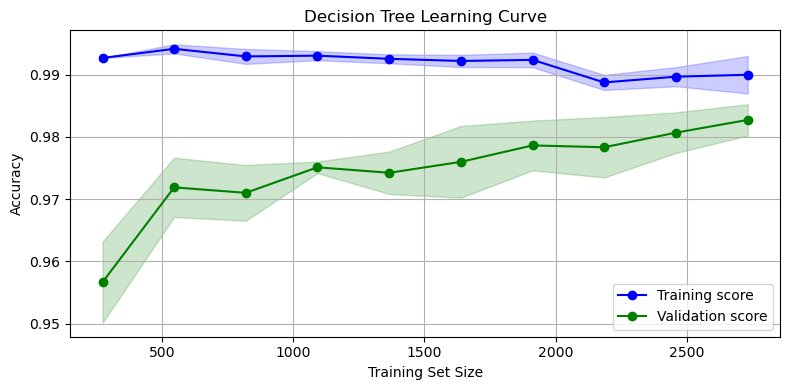

In [23]:
best_dt = grid_search.best_estimator_

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_dt,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

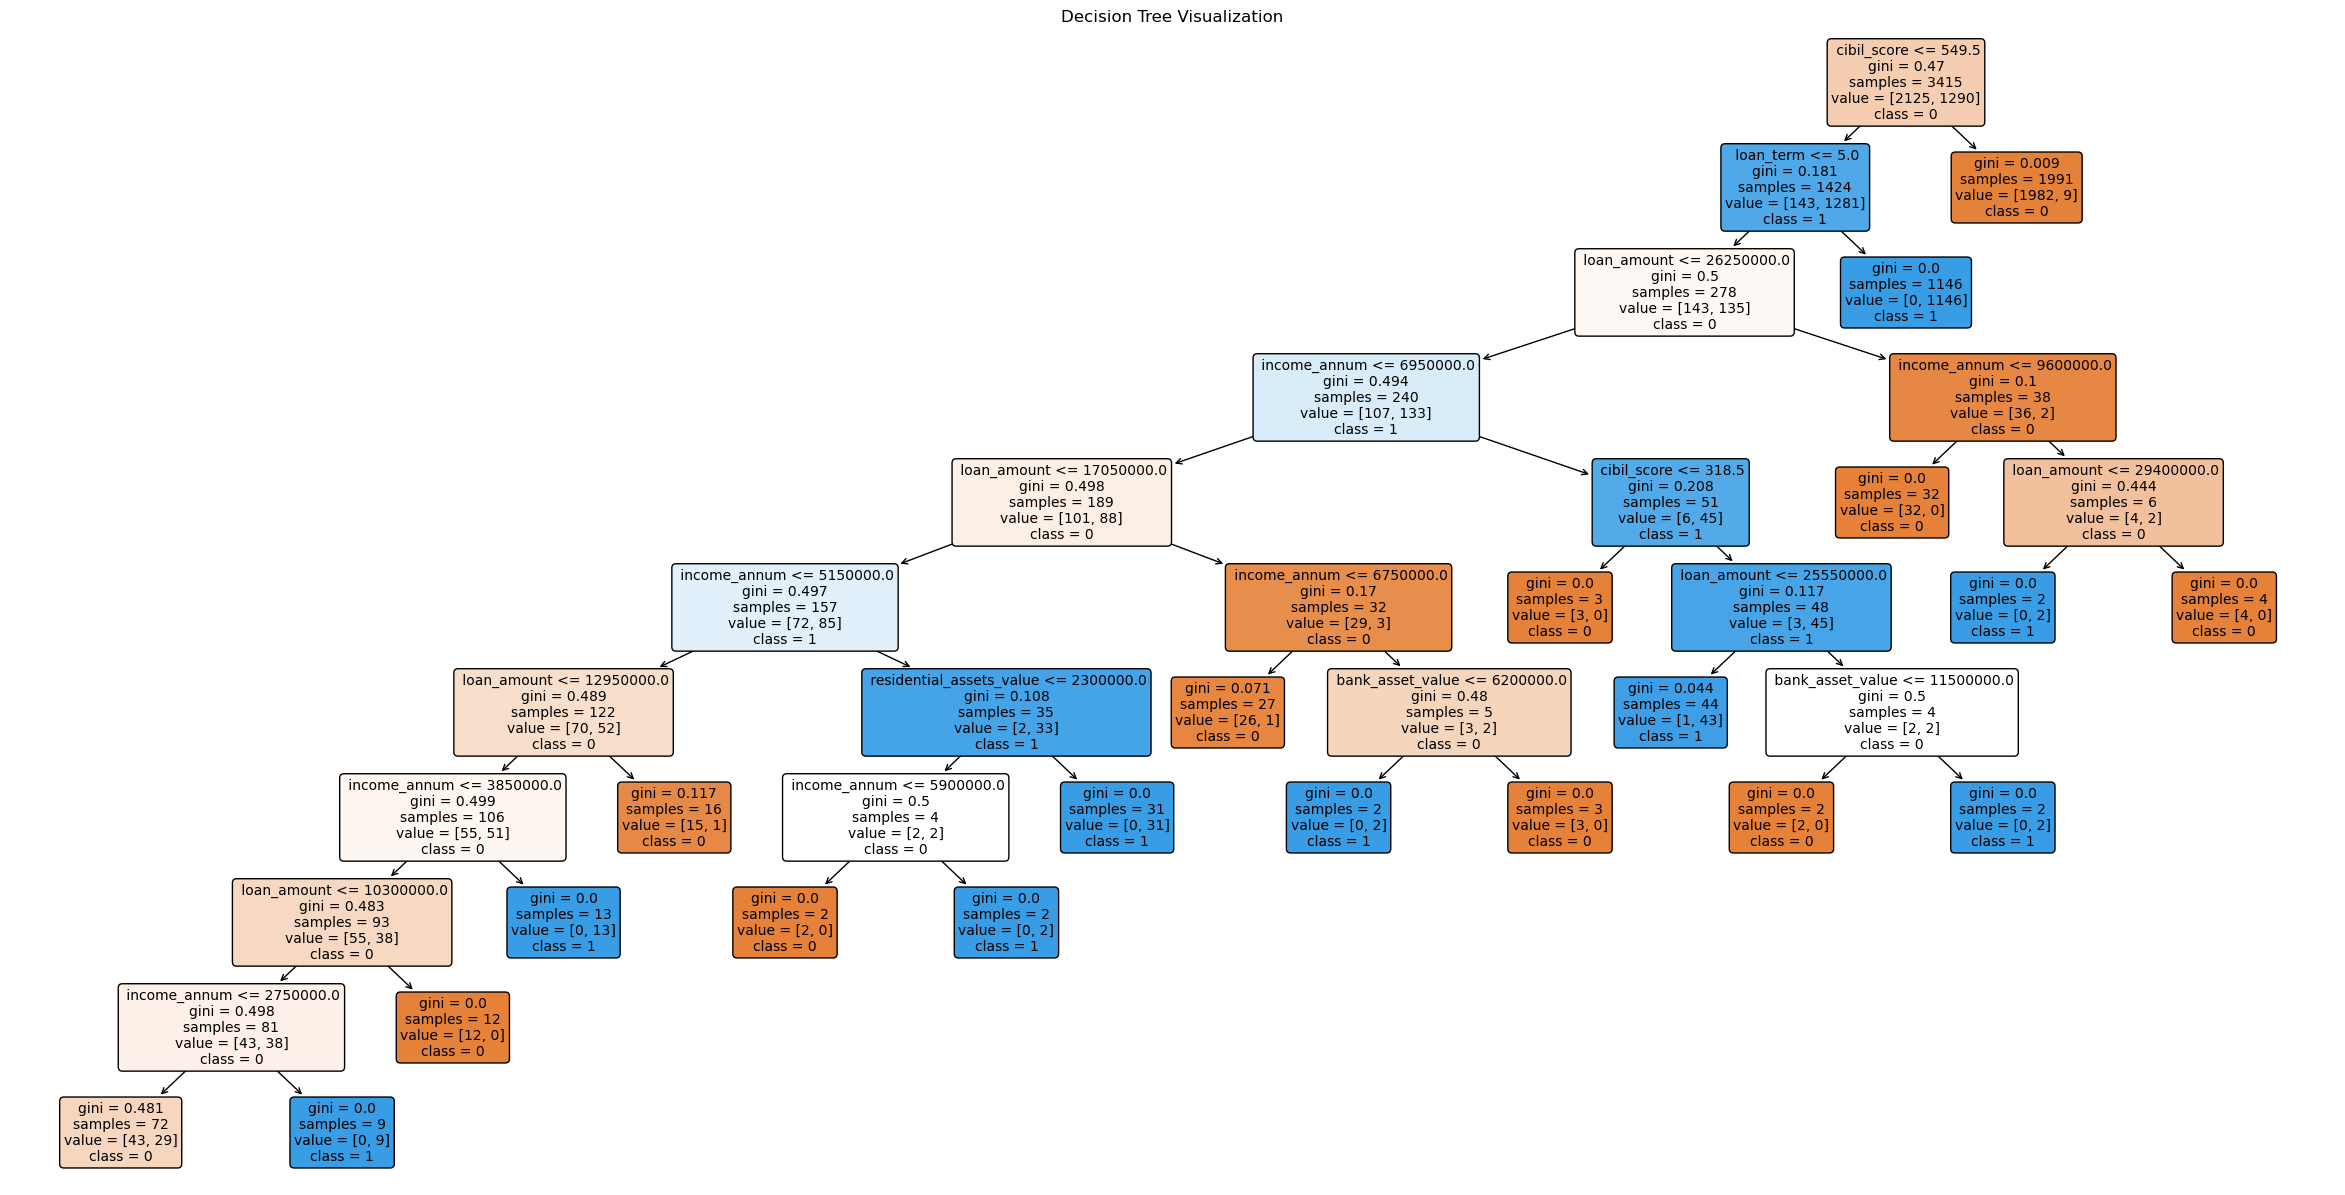

In [24]:
best_dt = grid_search.best_estimator_

plt.figure(figsize=(30, 15))
plot_tree(best_dt, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in y_train.unique()],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Params:", grid_search_rf.best_params_)

Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [26]:
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9765807962529274
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



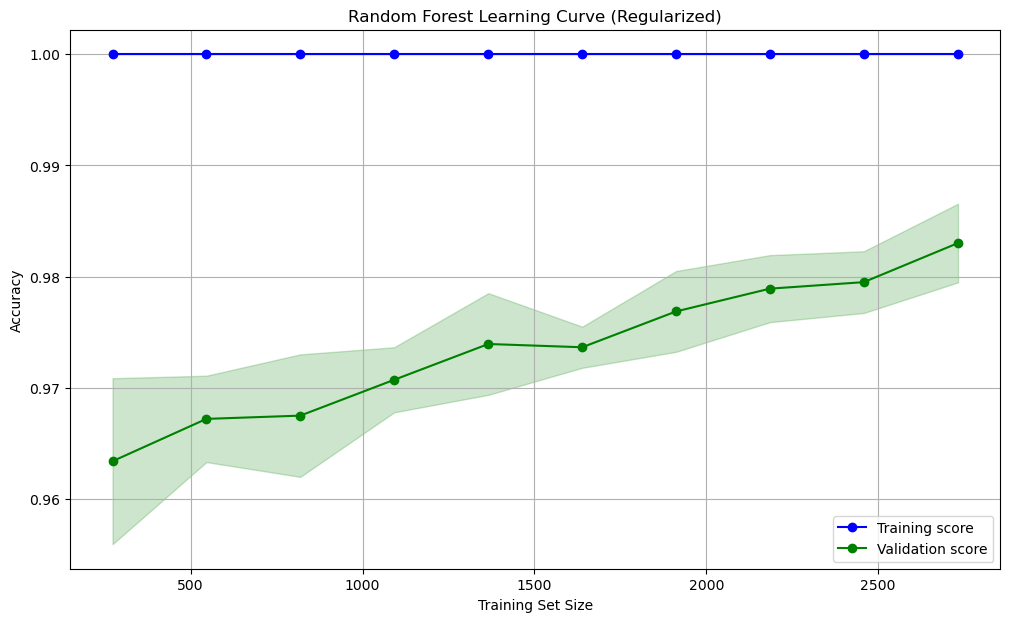

In [27]:
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 7))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')

plt.title('Random Forest Learning Curve (Regularized)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Conclusion

After tuning with grid search and cross-validation, the **Decision Tree** achieved a strong accuracy of **97.19%**, with balanced precision and recall, particularly excelling at correctly identifying rejected applications. A **Random Forest classifier** was also applied to potentially enhance performance through ensemble learning. While the Random Forest yielded a slightly higher accuracy of **97.66%**, further analysis revealed **signs of overfitting**, as the model performed exceptionally on the training data but showed marginally reduced generalization on unseen data. This suggests that while ensemble methods like Random Forest can boost predictive power, they may also require careful tuning and regularization to avoid overfitting. 

Overall, the Decision Tree offered a more interpretable and stable solution, making it a strong candidate for deployment in real-world loan approval systems where transparency and reliability are crucial.